Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [86]:
#running python 3.9.20
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [87]:
#Load our dataframes from our pickles
yelp_df = pd.read_pickle('../data/yelp_dataframe.pkl')
fsq_df = pd.read_pickle('../data/fsq_dataframe.pkl')
bike_df = pd.read_pickle('../data/bike_dataframe.pkl')
fsq_categories = pd.read_pickle('../data/fsq_categories_df.pkl')
yelp_categories = pd.read_pickle('../data/yelp_categories.pkl')


In [101]:
# Merging all the dataframes into one, this is a fairly useless file to start and I'll end up breaking it down.
complete_df = pd.merge(bike_df, fsq_df, how='outer', on='bs_id')
complete_df = pd.merge(complete_df, yelp_df, how='outer', on='bs_id')


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: >

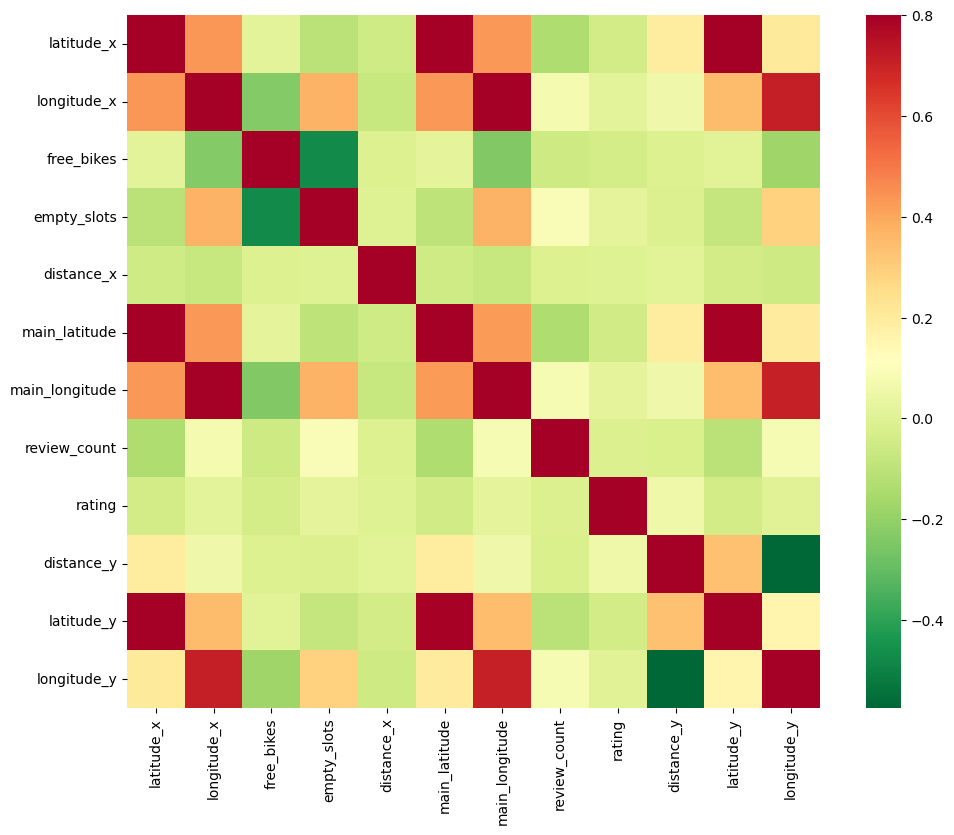

In [89]:
corrmat = complete_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

In [90]:
# We can see all the longitudes and latitudes correlate with each other... that is fairly useless lets drop them from the model
complete_df.drop(['latitude_x', 'longitude_x', 'main_latitude', 'main_longitude', 'latitude_y', 'longitude_y'], axis = 1, inplace = True)

<Axes: >

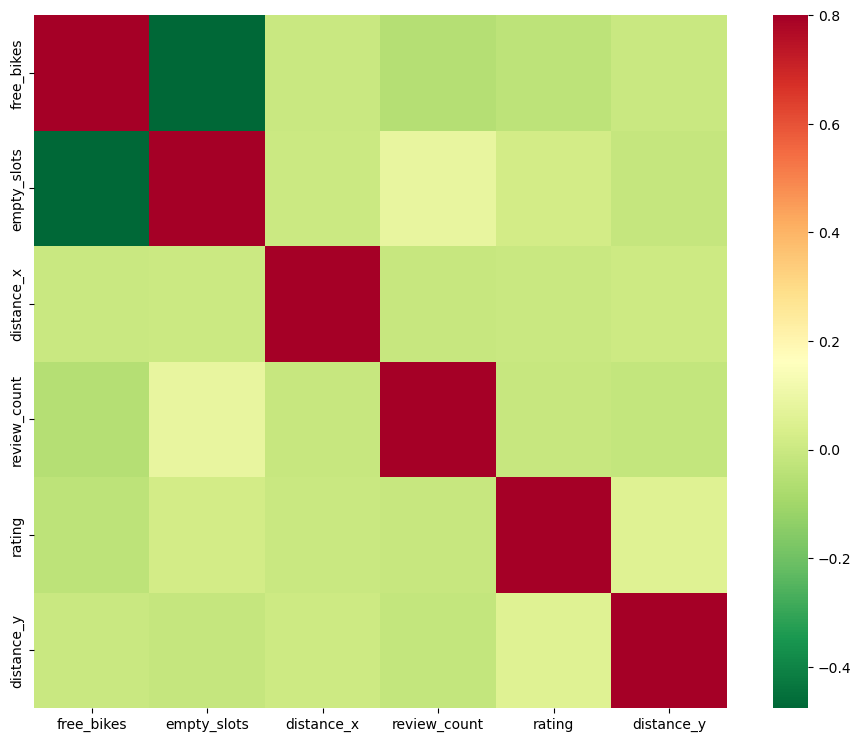

In [91]:
corrmat = complete_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Our ERD for our new Database

![image](images/bike_db_erd.png)

In [92]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


In [93]:
connection = create_connection("../data/stats_modeling_db.sqlite")

Connection to SQLite DB successful


In [94]:
try:
    bike_df.to_sql('bike_stations', con=connection,if_exists='replace',index=False)
    print('bikes loaded succesfully')
except Error as e:
    print(f'error in bikes loading: {e}')
try:
    yelp_df.to_sql('yelp', con=connection,if_exists='replace',index=False)
    print('yelp loaded succesfully')
except Error as e:
    print(f'error in yelp loading: {e}')
try:
    fsq_df.to_sql('foursquare', con=connection,if_exists='replace',index=False) 
    print('foursquare loaded succesfully')
except Error as e:
    print(f'error in foursquare loading: {e}')
try:
    fsq_categories.to_sql('fsq_categories', con=connection,if_exists='replace',index=False) 
    print('fsq_categories loaded succesfully')
except Error as e:
    print(f'error in fsq_categories loading: {e}')    
try:
    yelp_categories.to_sql('yelp_categories', con=connection,if_exists='replace',index=False) 
    print('yelp_categories loaded succesfully')
except Error as e:
    print(f'error in yelp_categories loading: {e}')

bikes loaded succesfully
yelp loaded succesfully
foursquare loaded succesfully
fsq_categories loaded succesfully
yelp_categories loaded succesfully


Look at the data before and after the join to validate your data.

In [95]:
query = """SELECT * FROM bike_stations"""
pd.read_sql_query(query, connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bs_id        167 non-null    object 
 1   latitude     167 non-null    float64
 2   longitude    167 non-null    float64
 3   timestamp    167 non-null    object 
 4   free_bikes   167 non-null    int64  
 5   empty_slots  167 non-null    int64  
 6   uid          167 non-null    object 
 7   address      167 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 10.6+ KB


In [100]:
#data from before I put it into the database
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yelp_id       8348 non-null   object 
 1   name          8348 non-null   object 
 2   review_count  8348 non-null   int64  
 3   rating        8348 non-null   float64
 4   price         6718 non-null   object 
 5   distance      8348 non-null   float64
 6   bs_id         8348 non-null   object 
 7   latitude      8348 non-null   float64
 8   longitude     8348 non-null   float64
 9   address1      8325 non-null   object 
 10  zip_code      8348 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 717.5+ KB


- We can see that the bike dataframe has for the most part kept its integrity, just losing its datetime datatype on the timestamp column.